<a href="https://colab.research.google.com/github/SenaKymk/MachineLearning201/blob/main/RidgeRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import numpy as np
import pandas  as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline



In [4]:
df = pd.read_csv("/content/Hitters.csv")
#dosyadaki eksik değerleri yok ederiz
df=df.dropna()
#veri setindeki kategorik değişkenleri çevirdik
dms = pd.get_dummies(df[["League","Division","NewLeague"]])

y =df["Salary"] #bağımlı değişken

X_ = df.drop(["Salary","League","Division","NewLeague"],axis =1).astype("float64")
# bağımsız değikenler oluşturulur
X = pd.concat ([X_,dms[["League_N","Division_W","NewLeague_N"]]], axis=1)
#verisetini ayırırız
X_train, X_test , y_train, y_test =train_test_split(X,y,test_size=0.25,random_state =42)


In [5]:
df.head()


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [6]:
ridge_model = Ridge(alpha= 0.1).fit(X_train, y_train)

In [7]:
ridge_model

Ridge(alpha=0.1)

In [8]:
ridge_model.coef_

array([ -1.77435737,   8.80240528,   7.29595605,  -3.33257639,
        -2.08316481,   5.42531283,   7.58514945,  -0.13752764,
        -0.20779701,  -0.60361067,   1.7927957 ,   0.72866408,
        -0.68710375,   0.26153564,   0.26888652,  -0.52674278,
       112.14640272, -99.80997876, -48.07152768])

In [9]:
#farklı lamda değerlerine göre değişim

ridge_model.intercept_

-4.578626905723354

In [10]:
np.linspace(10,-2,100)

array([10.        ,  9.87878788,  9.75757576,  9.63636364,  9.51515152,
        9.39393939,  9.27272727,  9.15151515,  9.03030303,  8.90909091,
        8.78787879,  8.66666667,  8.54545455,  8.42424242,  8.3030303 ,
        8.18181818,  8.06060606,  7.93939394,  7.81818182,  7.6969697 ,
        7.57575758,  7.45454545,  7.33333333,  7.21212121,  7.09090909,
        6.96969697,  6.84848485,  6.72727273,  6.60606061,  6.48484848,
        6.36363636,  6.24242424,  6.12121212,  6.        ,  5.87878788,
        5.75757576,  5.63636364,  5.51515152,  5.39393939,  5.27272727,
        5.15151515,  5.03030303,  4.90909091,  4.78787879,  4.66666667,
        4.54545455,  4.42424242,  4.3030303 ,  4.18181818,  4.06060606,
        3.93939394,  3.81818182,  3.6969697 ,  3.57575758,  3.45454545,
        3.33333333,  3.21212121,  3.09090909,  2.96969697,  2.84848485,
        2.72727273,  2.60606061,  2.48484848,  2.36363636,  2.24242424,
        2.12121212,  2.        ,  1.87878788,  1.75757576,  1.63

In [11]:
lambdalar = 10**np.linspace(10,-2,100)*0.5

In [12]:
lambdalar

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

In [13]:
ridge_model =Ridge()
katsayilar=[]

for i in lambdalar :
  ridge_model.set_params(alpha = i)
  ridge_model.fit(X_train, y_train)
  katsayilar.append(ridge_model.coef_)

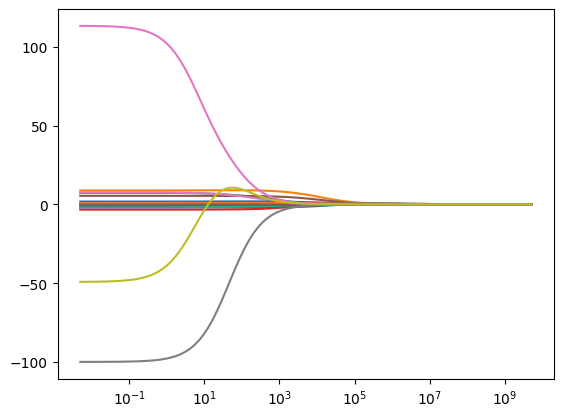

In [14]:
ax= plt.gca()
ax.plot(lambdalar,katsayilar)
ax.set_xscale("log")

TAHMİN


In [15]:
ridge_model = Ridge().fit(X_train, y_train)
y_pred = ridge_model.predict(X_train)

In [16]:
y_pred[0:10]


array([ 376.25245449,  803.38498121,  496.17669652,  112.69554648,
        427.60020221, 1003.6309402 ,  153.45713944,  361.33880956,
        483.29143665,  916.91439669])

In [17]:
y_train[0:10]

,Salary
183,125.0
229,1940.0
286,940.0
102,375.0
153,100.0
320,960.0
135,90.0
213,100.0
308,750.0
161,657.0


In [19]:
RMSE= np.sqrt(mean_squared_error(y_train,y_pred))
RMSE #train hatamız budur

289.34470696006565

In [23]:
np.sqrt(np.mean(-cross_val_score(ridge_model,X_train,y_train,cv =10,scoring="neg_mean_squared_error")))

351.3931585606325

In [24]:
#test hatası
y_pred =ridge_model.predict(X_test)

In [25]:
RMSE= np.sqrt(mean_squared_error(y_test,y_pred))
RMSE

356.80829057302424

MODEL TUNNİNG
 neden  model tunning


In [27]:
ridge_model = Ridge(100).fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))


357.8154668279847

In [29]:
np.random.randint(0,1000,10)

array([667, 917, 812, 618, 462, 821, 220, 973, 149, 581])

In [30]:
lambdalar1 = np.random.randint(0,1000,10)
lambdalar2 = 10**np.linspace(10,-2,100)*0.5

In [36]:
ridgecv = make_pipeline(StandardScaler(), RidgeCV(alphas=lambdalar2, scoring="neg_mean_squared_error", cv=10))
ridgecv.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ridgecv',
                 RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501...
       3.06795364e+00, 2.32079442e+00, 1.75559587e+00, 1.32804389e+00,
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
                         cv=10, scoring='neg_mean_squared_error'))])

In [37]:
Ridge(alpha=ridgecv.named_steps["ridgecv"].alpha_).fit(X_train,y_train)

Ridge(alpha=115.5064850041579)

In [38]:
y_pred = ridgecv.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

386.0920755067467